# 01. Data Preprocessing & EDA

## Objectives
1. Load the Credit Card Fraud Dataset.
2. Exploratory Data Analysis (EDA) to understand distributions.
3. Handle Class Imbalance using SMOTE.
4. Scale features for Quantum/Classical models.

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Add parent dir to path
sys.path.append(os.path.abspath(os.path.join('..', '..')))

from ml_engine.config import DATA_FILE_PATH

# Checking if file exists
if not os.path.exists(DATA_FILE_PATH):
    print(f"WARNING: {DATA_FILE_PATH} not found. Please place creditcard.csv in data/ folder.")
else:
    print("Data file found!")

ModuleNotFoundError: No module named 'ml_engine'

### 1. Load Data

In [ ]:
df = pd.read_csv(DATA_FILE_PATH)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 2. Class Imbalance Visualization

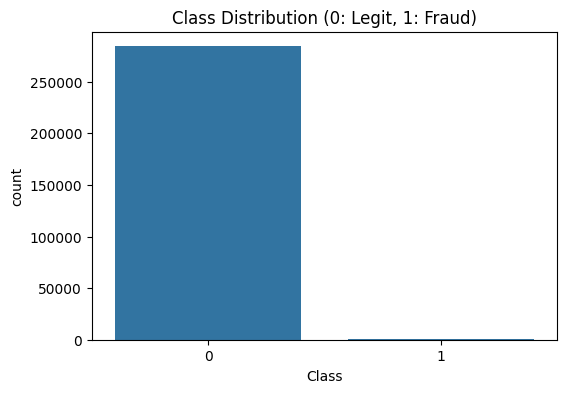

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legit, 1: Fraud)')
plt.show()

print(df['Class'].value_counts(normalize=True))

### 3. Missing Value Check

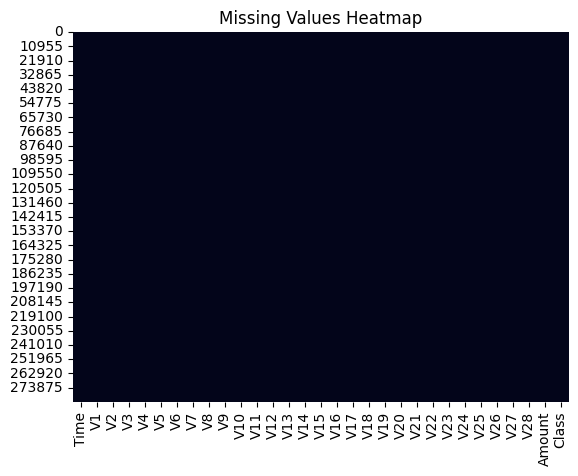

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### 4. Correlation Matrix
Understanding which features correlate most with Fraud.

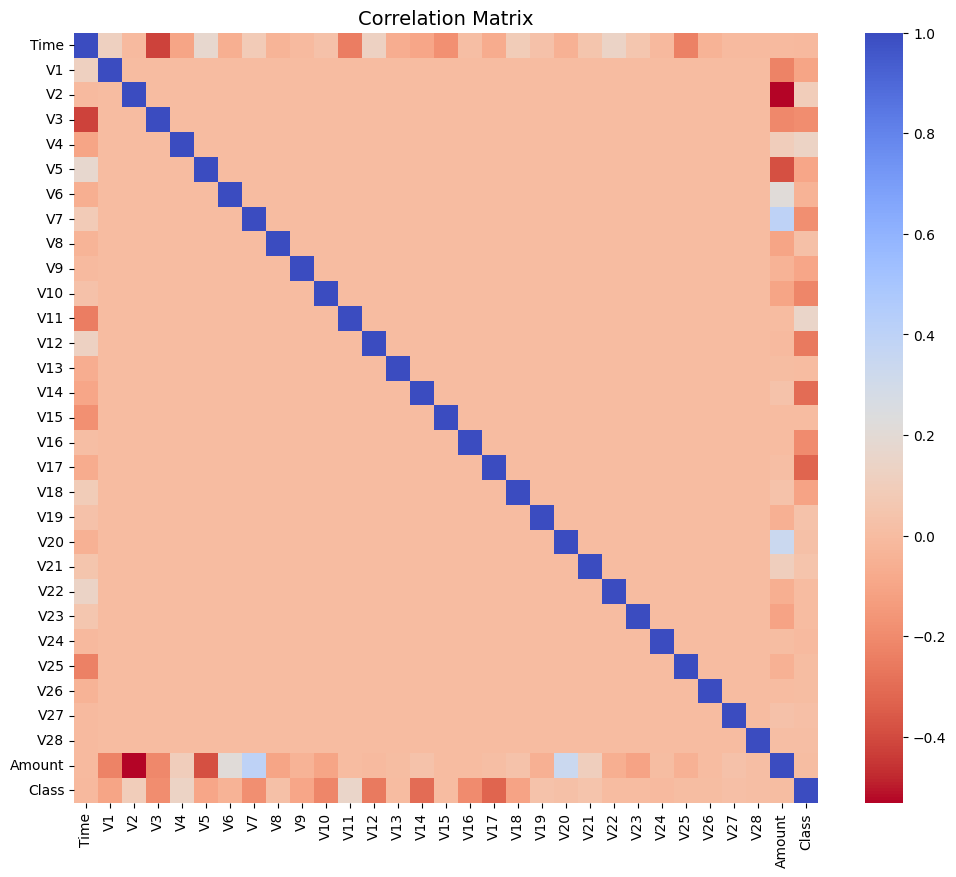

In [ ]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 20})
plt.title("Correlation Matrix", fontsize=14)
plt.show()

### 5. SMOTE Oversampling Visualization
We use the pre-built logic from `ml_engine.dataset` but visualize the effect here.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Sample run on a subset just for visualization
X = df.drop('Class', axis=1)
y = df['Class']

print("Original dataset shape %s" % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Resampled dataset shape %s" % Counter(y_res))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})
